In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Daily Household Transactions.csv')

df.head()


,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [4]:
#Check missing values
missing_values = df.isnull().sum()
print(missing_values)


Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64


In [5]:
df['Subcategory'].fillna('Unknown', inplace=True)
df.dropna(subset=['Note'], inplace=True)

C:\Users\AUM\AppData\Local\Temp\ipykernel_35320\3427771299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('Unknown', inplace=True)


In [6]:
#Check duplicate values
duplicate_values = df.duplicated()
print(duplicate_values)

0       False
1       False
2       False
3       False
4       False
        ...  
2456    False
2457    False
2458    False
2459    False
2460    False
Length: 1940, dtype: bool


In [7]:
df.drop_duplicates(inplace=True)

In [8]:
#Verify data types
df.dtypes

Date               object
Mode               object
Category           object
Subcategory        object
Note               object
Amount            float64
Income/Expense     object
Currency           object
dtype: object

In [9]:
#Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, format='mixed', errors='coerce')


In [10]:
df.dtypes

Date              datetime64[ns]
Mode                      object
Category                  object
Subcategory               object
Note                      object
Amount                   float64
Income/Expense            object
Currency                  object
dtype: object

Exploratory Data Analysis

In [11]:
df.describe()

,Date,Amount
count,1940,1940.000000
mean,2017-04-07 06:13:17.686598144,2335.860923
min,2015-01-01 00:00:00,2.000000
25%,2016-11-10 00:00:00,30.000000
50%,2017-06-27 10:02:37,71.500000
75%,2018-01-26 10:05:58,300.000000
max,2018-09-20 12:04:08,200000.000000
std,NaN,11715.208896


This shows highly skewed distribution in the Amount column, likely due to a few large transactions(eg. the 200,000 INR entry)

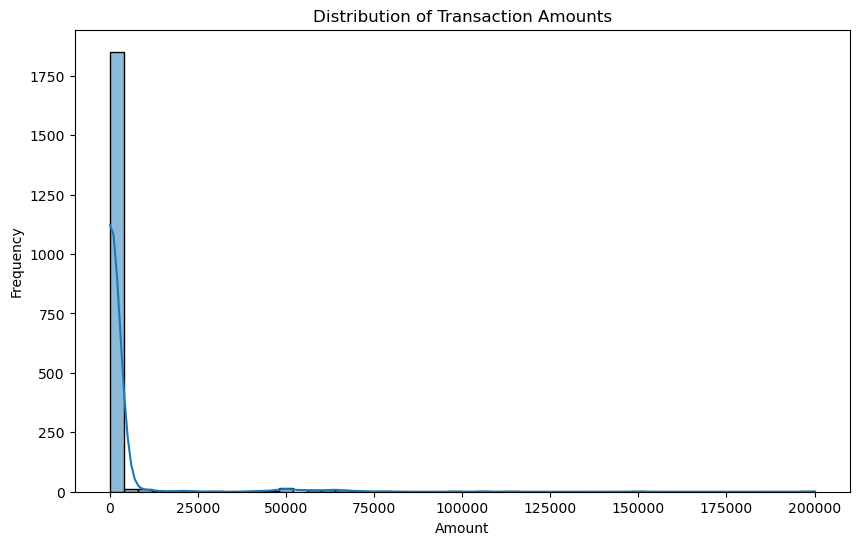

In [12]:
# Distribution of transaction amounts
plt.figure(figsize=(10,6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

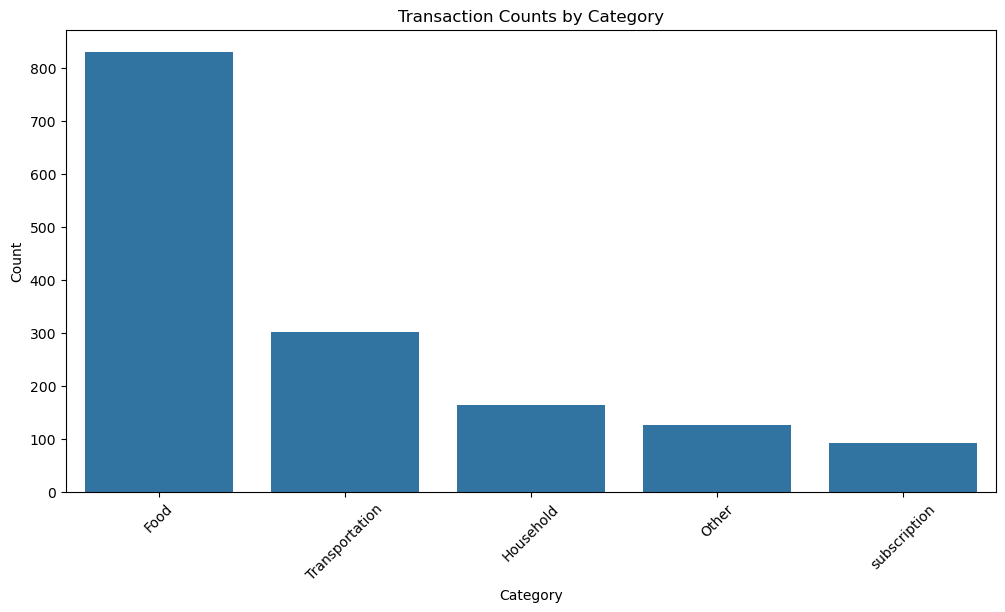

In [23]:
# Transaction counts by category

plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().iloc[:5].index)
plt.title('Transaction Counts by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

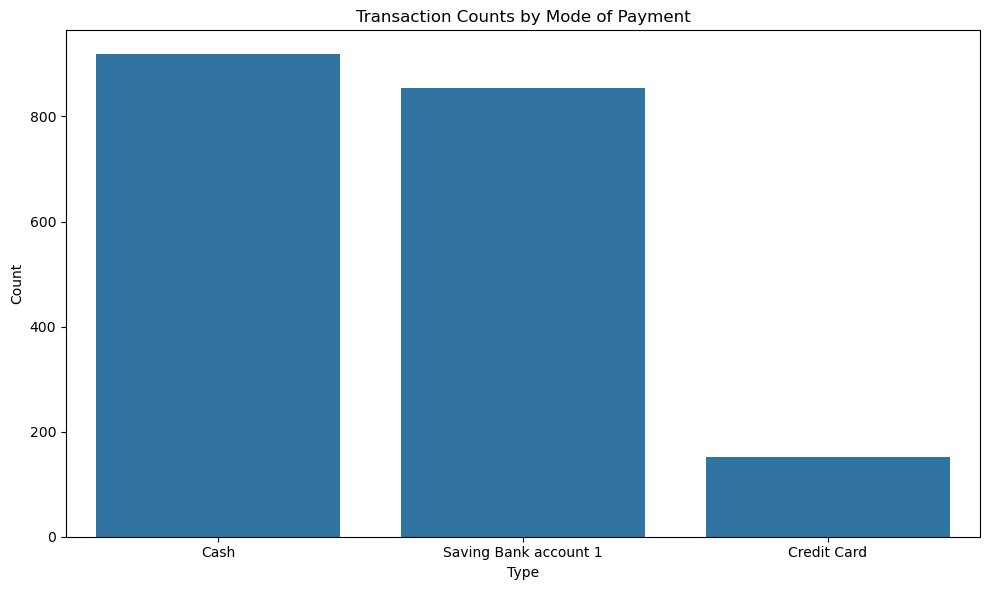

In [22]:
# Transaction counts by type

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Mode', order=df['Mode'].value_counts().iloc[:3].index)
plt.title('Transaction Counts by Mode of Payment')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

Time Series Analysis

C:\Users\AUM\AppData\Local\Temp\ipykernel_35320\12056597.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M', on='Date').sum()


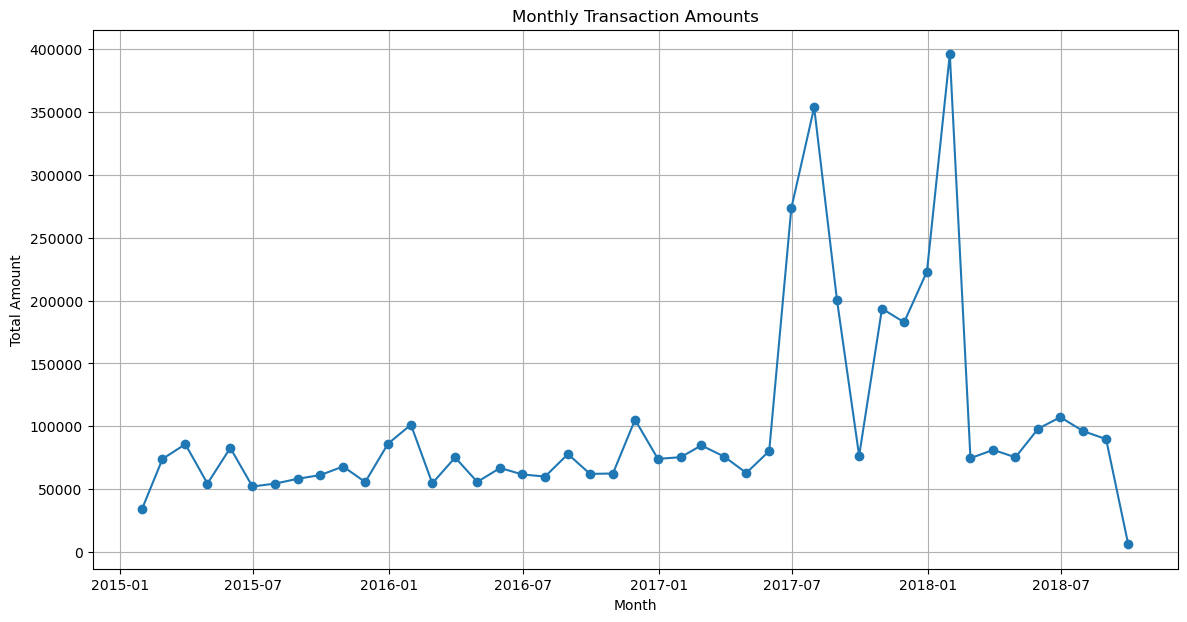

In [15]:
# Resample data to monthly frequency

monthly_data = df.resample('M', on='Date').sum()

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data['Amount'], marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

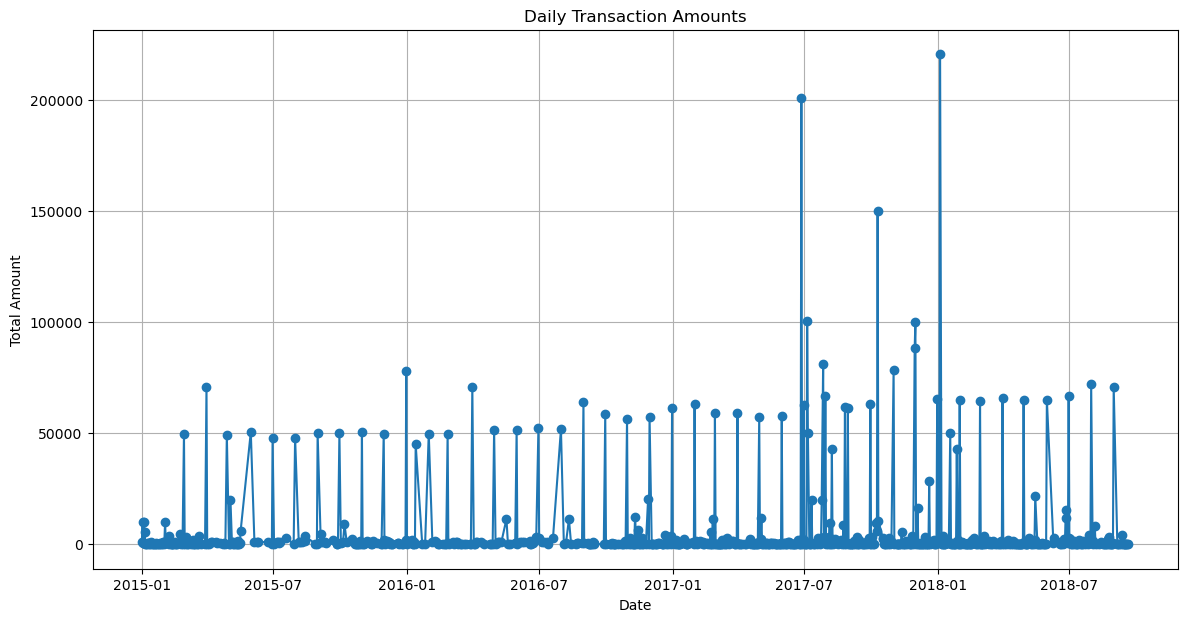

In [17]:
# Daily trends
daily_data = df.groupby(df['Date'].dt.date).sum(numeric_only=True)

plt.figure(figsize=(14,7))
plt.plot(daily_data.index, daily_data['Amount'], marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Correlation Analysis

In [18]:
# Create a pivot table fo correlation analysis

pivot_table = df.pivot_table(index='Date', columns='Category', values='Amount',
                              aggfunc='sum', fill_value=0)



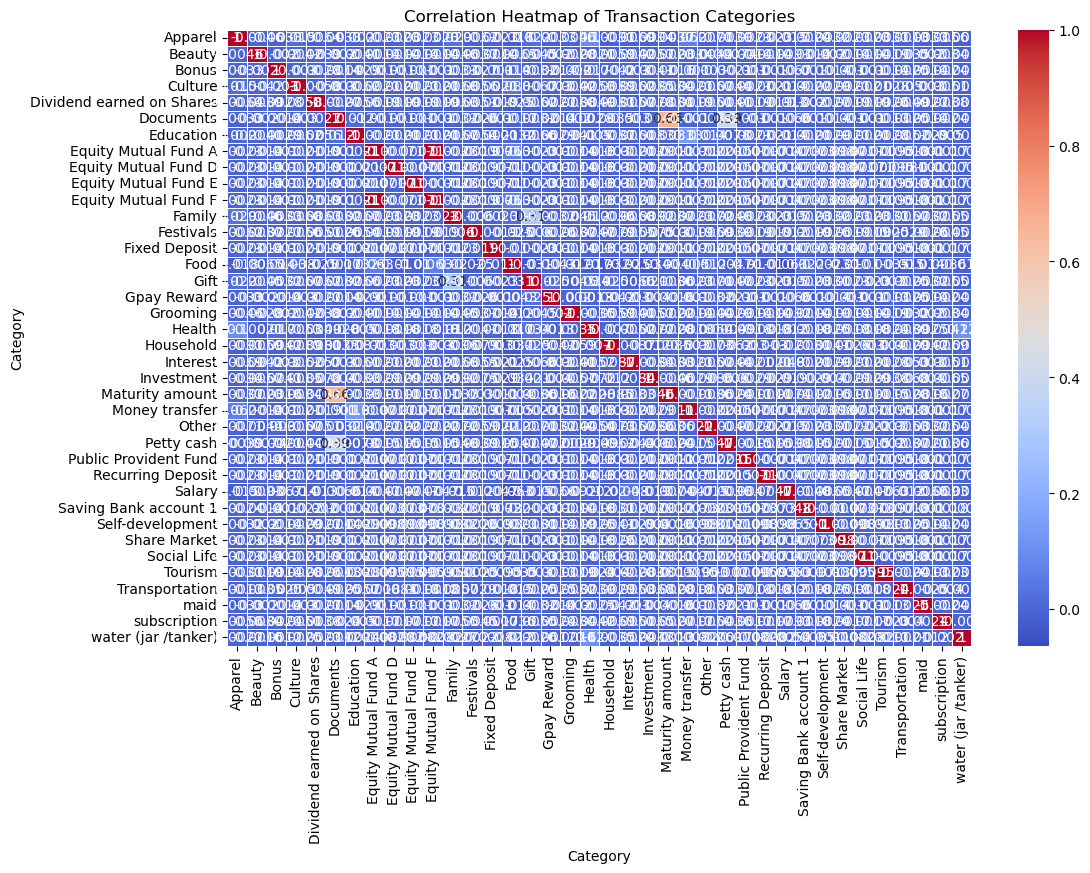

In [21]:
# Calculate correlation matrix
correlation_matrix = pivot_table.corr()

# Plor correlation heatmap

plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Categories')
plt.show()

Report

Summary

The financial transactions dataset was analyzed to identify key trenda and insights. The data cleaning process involved handling missing values, correcting data types and removing duplicates. Exploratory Data Analysis (EDA) revealed the distribution of transaction amounts, transaction counts by category and type, and significat patterns over time. Time series analysis highlighted monthly and daily transaction trends. Correlation analysis identified relationships between different transaction categories.

Key Findings

- The distribution of transaction amounts showed a right-skewed pattern wiht most transactions clustered around lower values.
- Sales and Purchases were the most common transaction categories.
- Credit transactions were more frequent than Debit transactions.
- Monthly transactions trends revealed seasonal patterns with peaks in certain months.
- Correlation analysis indicated strong relationships between certain transaction categories.